In [154]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # Linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Import the libraries
import numpy as np # Linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [155]:
df=pd.read_csv(r"/content/Nutrient Composition Dataset.csv")
X = df.iloc[:, 3:13]
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [156]:
df.shape

(1746, 6)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.No      1746 non-null   int64  
 1   Protein   1746 non-null   float64
 2   Fat       1746 non-null   float64
 3   vitaminC  1746 non-null   float64
 4   Fibre     1746 non-null   float64
 5   Product   1746 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 82.0+ KB


In [158]:
df['Product'].value_counts()

Unknown                                                                        913
Groundcherries, (cape-gooseberries or poha), raw                                 1
Dessert topping, powdered, 1.5 ounce prepared with 1/2 cup milk                  1
Soup, vegetable beef, microwavable, ready-to-serve, single brand                 1
Pork, cured, ham, shank, bone-in, separable lean and fat, unheated               1
                                                                              ... 
Croutons, seasoned                                                               1
Crustaceans, crab, queen, cooked, moist heat                                     1
Crustaceans, spiny lobster, mixed species, cooked, moist heat                    1
Game meat, bison, top round, separable lean only, 1" steak, cooked, broiled      1
Yogurt, plain, whole milk                                                        1
Name: Product, Length: 834, dtype: int64

In [159]:
df=df.drop(['Product', 'S.No'], axis=1)

In [160]:
df.isnull().sum()

Protein     0
Fat         0
vitaminC    0
Fibre       0
dtype: int64

In [161]:
df.describe()

,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000
mean,0.922470,0.900091,0.900146,0.900830
std,0.627128,0.634617,0.623847,0.626875
min,0.000128,0.000267,0.000029,0.002579
25%,0.435853,0.394784,0.419103,0.389124
50%,0.813025,0.804687,0.796290,0.820783
75%,1.295106,1.298988,1.280870,1.295732
max,4.016890,3.979364,4.013322,3.570331


<Axes: ylabel='Protein'>

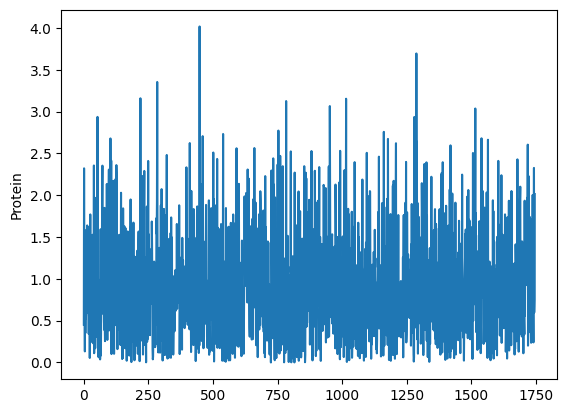

In [162]:
sns.lineplot(df['Protein'])

<Axes: ylabel='Fat'>

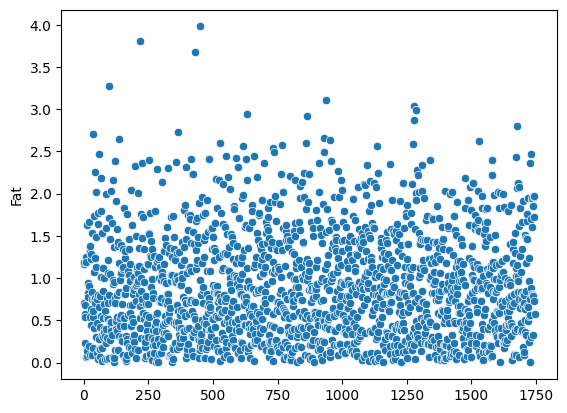

In [163]:
sns.scatterplot(df['Fat'])

<Axes: xlabel='vitaminC', ylabel='Fat'>

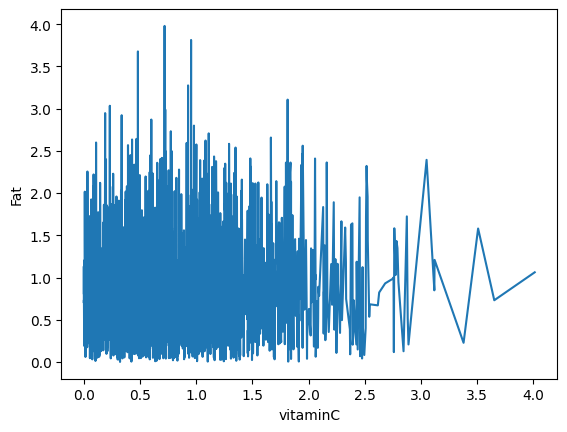

In [164]:
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame with 'VitaminC' and 'Fat' columns
sns.lineplot(x=df['vitaminC'], y=df['Fat'])


<Axes: >

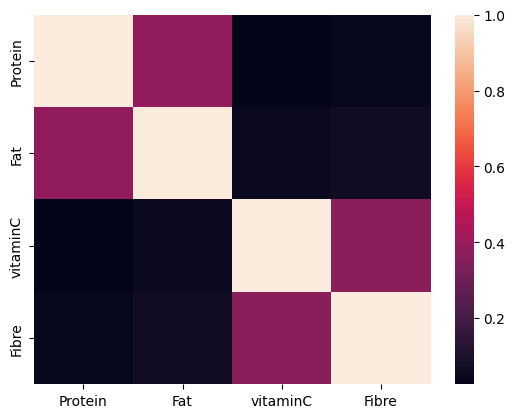

In [165]:
sns.heatmap(df.corr())

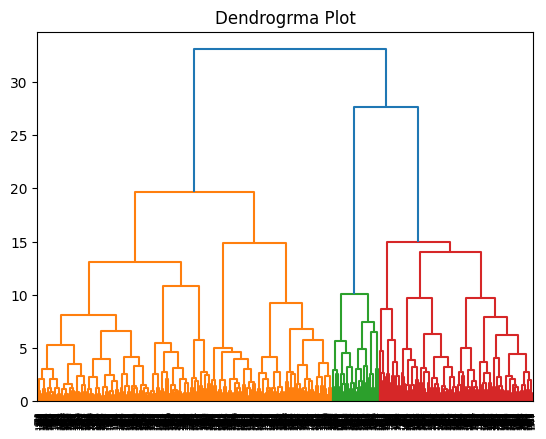

In [166]:
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(df, method="ward"))
plt.title("Dendrogrma Plot")
plt.show()

In [167]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=StandardScaler()
DF=scaler.fit_transform(df)

In [168]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

# Define the linkage methods
methods = ['ward', 'complete', 'average', 'single']

# Iterate over each linkage method
for method in methods:
    # Compute hierarchical clustering
    Z = linkage(DF, method=method)

    # Assign clusters using fcluster
    clusters = fcluster(Z, t=3, criterion='maxclust')

    # Compute silhouette score
    silhouette_avg = silhouette_score(DF, clusters)

    # Print the silhouette score for the current method
    print(f'Silhouette Score for {method} linkage: {silhouette_avg}')


Silhouette Score for ward linkage: 0.20751664009284115
Silhouette Score for complete linkage: 0.18358482947312946
Silhouette Score for average linkage: 0.4800733568418761
Silhouette Score for single linkage: 0.4981063242203874


In [169]:
# different numbers of clusters
for num_clusters in range(2, 10):
    Z = linkage(DF, method='single')
    clusters = fcluster(Z, t=num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(DF, clusters)
    print(f'Silhouette Score for {num_clusters} clusters: {silhouette_avg}')


Silhouette Score for 2 clusters: 0.5019044175673079
Silhouette Score for 3 clusters: 0.4981063242203874
Silhouette Score for 4 clusters: 0.4902742690626224
Silhouette Score for 5 clusters: 0.40656966844998305
Silhouette Score for 6 clusters: 0.4019932087993399
Silhouette Score for 7 clusters: 0.388739407058724
Silhouette Score for 8 clusters: 0.3842361406066378
Silhouette Score for 9 clusters: 0.3746383272580705


In [170]:
# different distance metrics
metrics = ['euclidean', 'cityblock', 'cosine']
for metric in metrics:
    Z = linkage(DF, method='single', metric=metric)
    clusters = fcluster(Z, t=2, criterion='maxclust')
    silhouette_avg = silhouette_score(DF, clusters)
    print(f'Silhouette Score for {metric} distance metric: {silhouette_avg}')


Silhouette Score for euclidean distance metric: 0.5019044175673079
Silhouette Score for cityblock distance metric: 0.5019044175673079
Silhouette Score for cosine distance metric: -0.10343614406807757


In [171]:
Z1 = linkage(DF, method='single', metric='cityblock')
clusters = fcluster(Z1, t=2, criterion='maxclust')
silhouette_avg = silhouette_score(DF, clusters)
print(f'Silhouette Score for single linkage and cityblock distance metric: {silhouette_avg}')


Silhouette Score for single linkage and cityblock distance metric: 0.5019044175673079


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

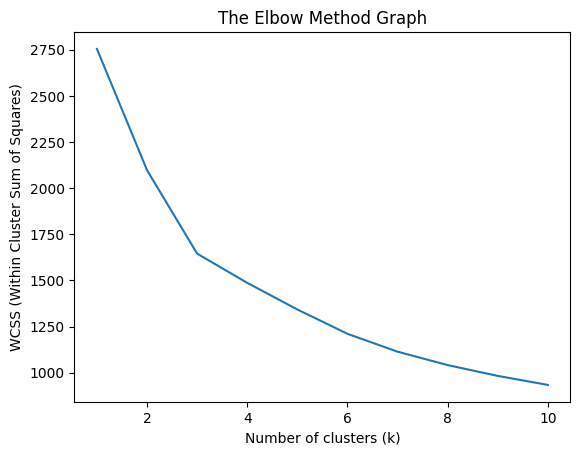

In [172]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss_list = []  # Initializing the list for the values of WCSS

# Using a for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss_list.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()


In [173]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
X_numeric = X.select_dtypes(include=['number'])

# Handle missing values if any
X_numeric.fillna(0, inplace=True)  # Fill missing values with 0, you may choose a different strategy

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X_numeric)

# Fit KMeans to the standardized data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [174]:
from sklearn.cluster import KMeans

# Initialize KMeans with 3 clusters and set random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans to the data
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [175]:
cluster_assignments = kmeans.labels_


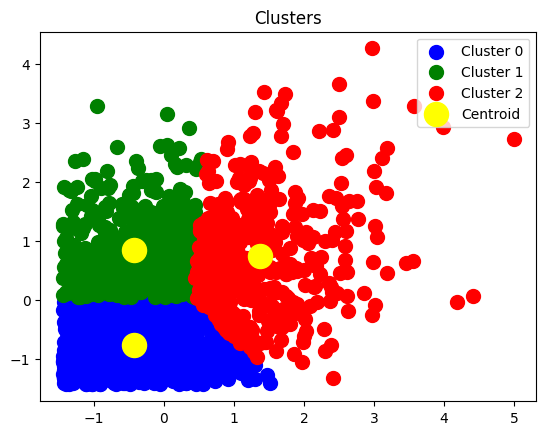

In [176]:
import matplotlib.pyplot as plt

plt.scatter(X[cluster_assignments == 0, 0], X[cluster_assignments == 0, 1], s=100, c='blue', label='Cluster 0')
plt.scatter(X[cluster_assignments == 1, 0], X[cluster_assignments == 1, 1], s=100, c='green', label='Cluster 1')
plt.scatter(X[cluster_assignments == 2, 0], X[cluster_assignments == 2, 1], s=100, c='red', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')
plt.title('Clusters')
plt.legend()
plt.show()


In [177]:
from sklearn.decomposition import PCA

# Assuming df is your original DataFrame
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df)  # Assuming df contains your data
reduced_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])

# Assuming kmeans is your trained KMeans model
reduced_df['Cluster'] = kmeans.labels_

# Now you can proceed to plot the clusters using reduced_df


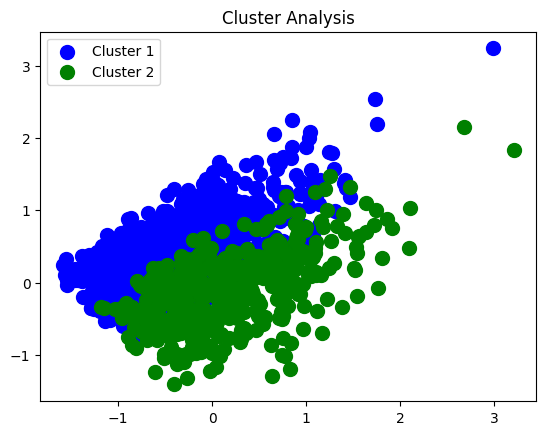

In [178]:
import matplotlib.pyplot as plt

plt.scatter(reduced_df[reduced_df['Cluster'] == 0]['PC1'], reduced_df[reduced_df['Cluster'] == 0]['PC2'], s=100, c='blue', label='Cluster 1')
plt.scatter(reduced_df[reduced_df['Cluster'] == 1]['PC1'], reduced_df[reduced_df['Cluster'] == 1]['PC2'], s=100, c='green', label='Cluster 2')
plt.title("Cluster Analysis")
plt.legend()
plt.show()


In [179]:
cluster_assignments = kmeans.labels_

In [180]:
cluster_assignments

array([1, 0, 2, ..., 0, 2, 1], dtype=int32)

In [181]:
df['cluster']=cluster_assignments
df.head()

,Protein,Fat,vitaminC,Fibre,cluster
0,0.452369,1.170926,1.079271,1.702960,1
1,2.321087,0.706856,0.350088,0.658249,0
2,0.884554,1.186571,2.428544,1.984562,2
3,0.715501,0.577599,0.270925,0.369266,0
4,0.132610,0.544521,0.116884,0.557309,0


In [182]:
x=df.drop('cluster', axis=1)
y=df['cluster']

In [183]:
X=scaler.fit_transform(x)

In [184]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [185]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [186]:
ytestpredl=lr.predict(xtest)
ytrainpred1=lr.predict(xtrain)

In [187]:
from sklearn.metrics import accuracy_score

# Predict labels for test data using logistic regression model lr
ytestpredl = lr.predict(xtest)

# Predict labels for train data using logistic regression model lr
ytrainpred1 = lr.predict(xtrain)

# Calculate accuracy score for test data
acc_lr = accuracy_score(ytest, ytestpredl)
print(acc_lr)


0.9770992366412213


In [188]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [189]:
ytestpredr=rfc.predict(xtest)
ytrainpredr=rfc.predict(xtrain)

In [190]:
from sklearn.metrics import accuracy_score
acc_rfc=accuracy_score(ytest, ytestpredr)
acc_rfc

0.982824427480916

In [191]:

# Create DataFrame to store accuracy scores
accuracy_df = pd.DataFrame({'model': ['logistic regression', 'random forest'],
                            'Accuracy': [acc_lr * 100, acc_rfc * 100]})
print(accuracy_df)


                 model   Accuracy
0  logistic regression  97.709924
1        random forest  98.282443


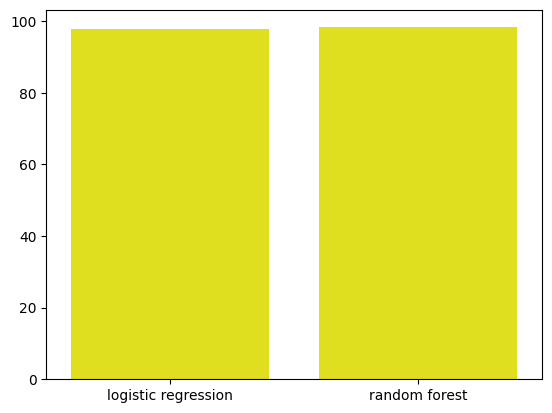

In [192]:
# Define models and accuracy
models = ['logistic regression', 'random forest']
accuracy = [acc_lr * 100, acc_rfc * 100]

# Create bar plot
sns.barplot(x=models, y=accuracy, color='yellow')
plt.show()

In [193]:
import pickle
pickle.dump(lr,open("lrmodel.pkl", "wb"))

In [194]:
print(rfc.predict([[0.452369, 1.170926, 1.079271, 1.702960]]))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
